# Data exploration notebook

## Imports and constants

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = '../data'
TRAIN_FILE = os.path.join(DATA_PATH, 'train.csv')
TEST_FILE = os.path.join(DATA_PATH, 'test.csv')
TRAIN_DIR = os.path.join(DATA_PATH, 'train/')
TEST_DIR = os.path.join(DATA_PATH, 'test/')

## Data import

In [3]:
train_df = pd.read_csv(TRAIN_FILE)
test_df = pd.read_csv(TEST_FILE)

In [4]:
train_df

class                           file_id
0       935  0b5b399ed90b7b8fc0f0b542e9eb15c6
1       921  a2b14ca04d4c00f82ee7822c8f6d189a
2        69  9e1f9edb55ae7b3d38a6949a3f1200dc
3      1019  dec60bc3a74f8cdb6d575abbabf296d3
4      1036  2a729645c662ec08bd60d254ea6773aa
...     ...                               ...
3592   1041  3fab800b6c98c694278057036ebb6204
3593    331  dcb6d3b8d4cf7ebb6ec6a7c9ac9a1ed3
3594    997  335678c77ca6b3a8496661e55e5294f0
3595    451  43deb615943694e702bd2afbe11106bf
3596    966  ee7a8ac4e196b82fc16d849ea933ff44

[3597 rows x 2 columns]

Number of classes:

In [5]:
train_df['class'].unique().__len__()

1200

In [6]:
test_df

class                           file_id
0         -1  837195b39a0c5a614325aebe9abb5c7f
1         -1  e80e94dc4706c1eb704bbbc94ed3630e
2         -1  2851ec4129446146c0e6f5e9125e9bb2
3         -1  ef6e46d5c504dca95f8db3b6ae382bf4
4         -1  ad7b7cc495dfc1e6beb19397c7de8b5e
...      ...                               ...
13110     -1  b702858cf32fefac66b98fb3647c62fd
13111     -1  90393581e695a22454956cdcadd78fb4
13112     -1  cdd59b15375cb54ffedac2b9b26a4969
13113     -1  d23e45904aaea8ec3ebf670e586bc849
13114     -1  a572dbdbd7d09487f18dae4dca77da73

[13115 rows x 2 columns]

So, our test is ~4 times bigger than train

Let's check if any file has more than one class:

In [7]:
(train_df['file_id'].value_counts() > 1).any()

False

## Visualizations

### Classes samples distribution in train

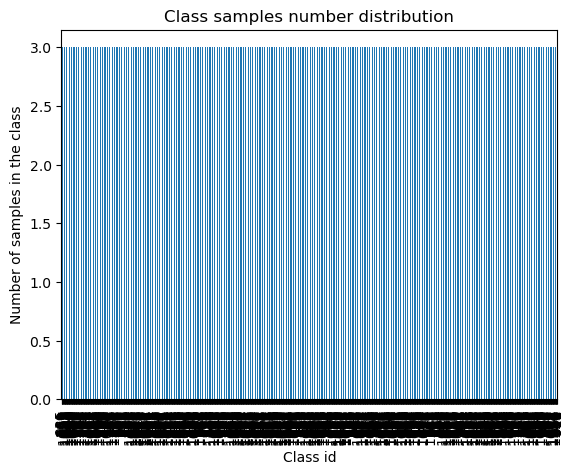

In [8]:
plt.title('Class samples number distribution')
plt.ylabel("Number of samples in the class")
train_df['class'].value_counts().plot(kind='bar')
plt.xlabel("Class id")

plt.show()

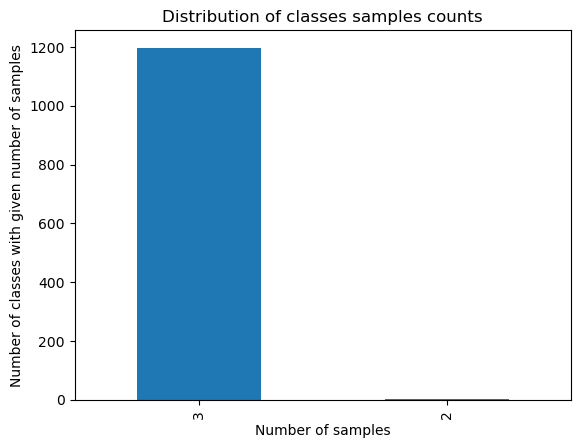

In [9]:
plt.title('Distribution of classes samples counts')
plt.ylabel("Number of classes with given number of samples")
train_df['class'].value_counts().value_counts().plot(kind='bar')
plt.xlabel("Number of samples")
plt.show()

So, we have a lot of classes with 3 samples and few with 2.

### Samples visualization

#### Train

In [10]:
RANDOM_CLASSES_COUNT = 5

In [11]:
chosen_classes = train_df['class'].value_counts().sample(RANDOM_CLASSES_COUNT).index
chosen_classes_df = train_df[train_df['class'].isin(chosen_classes)]

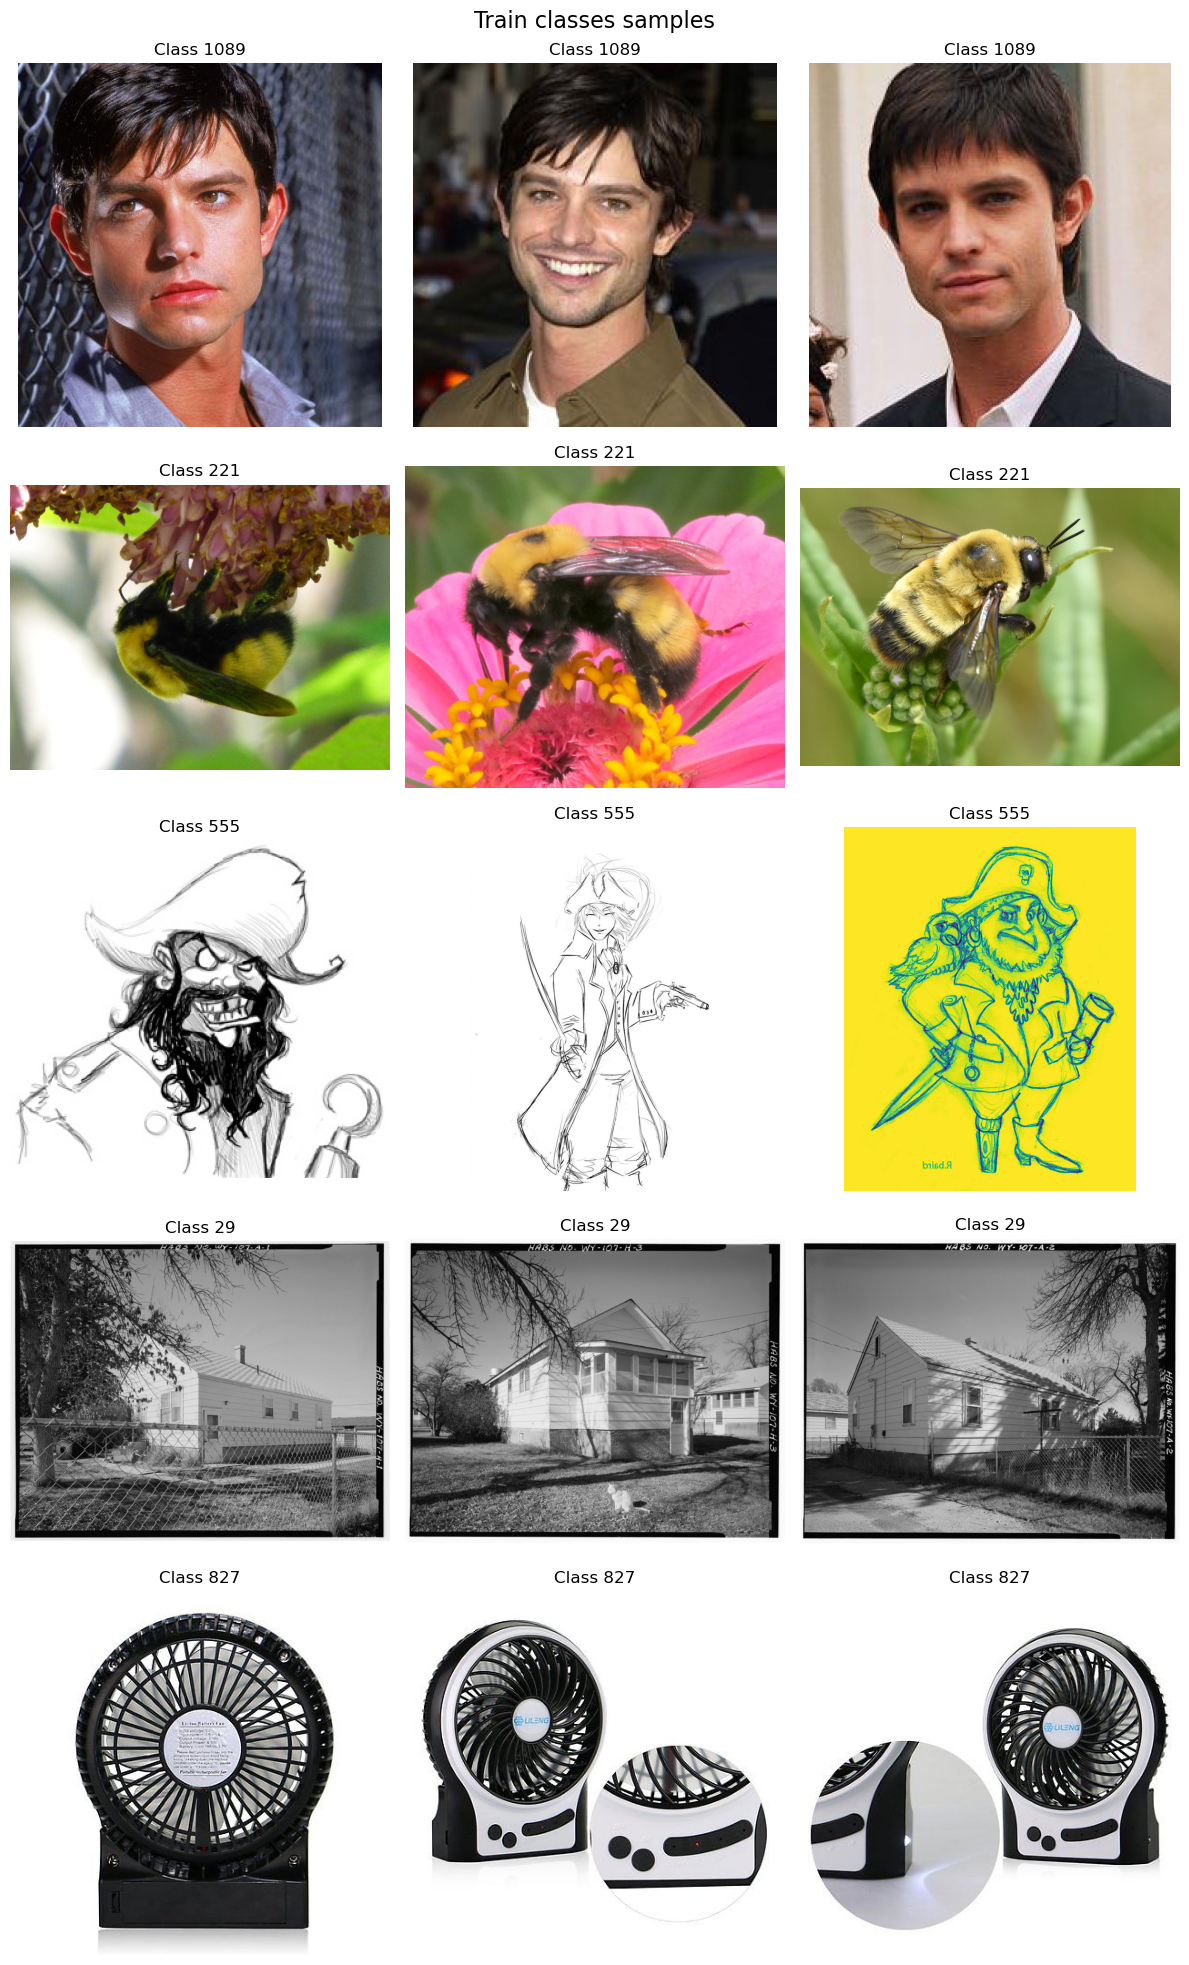

In [12]:
fig, axs = plt.subplots(RANDOM_CLASSES_COUNT, 3, figsize=(12, 4 * RANDOM_CLASSES_COUNT))
fig.suptitle("Train classes samples", fontsize=16)

for i, class_id in enumerate(chosen_classes):
    class_df = chosen_classes_df[chosen_classes_df['class'] == class_id]
    for j, (index, row) in enumerate(class_df.sample(3).iterrows()):
        img = plt.imread(os.path.join(TRAIN_DIR, f"{row['file_id']}.jpg"))
        axs[i, j].imshow(img)
        axs[i, j].set_title(f"Class {row['class']}")
        axs[i, j].axis('off')

fig.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

#### Test

In [13]:
ROWS_COUNT = 5
COLUMNS_COUNT = 5

In [14]:
chosen_test_samples_df = test_df.sample(ROWS_COUNT * COLUMNS_COUNT)

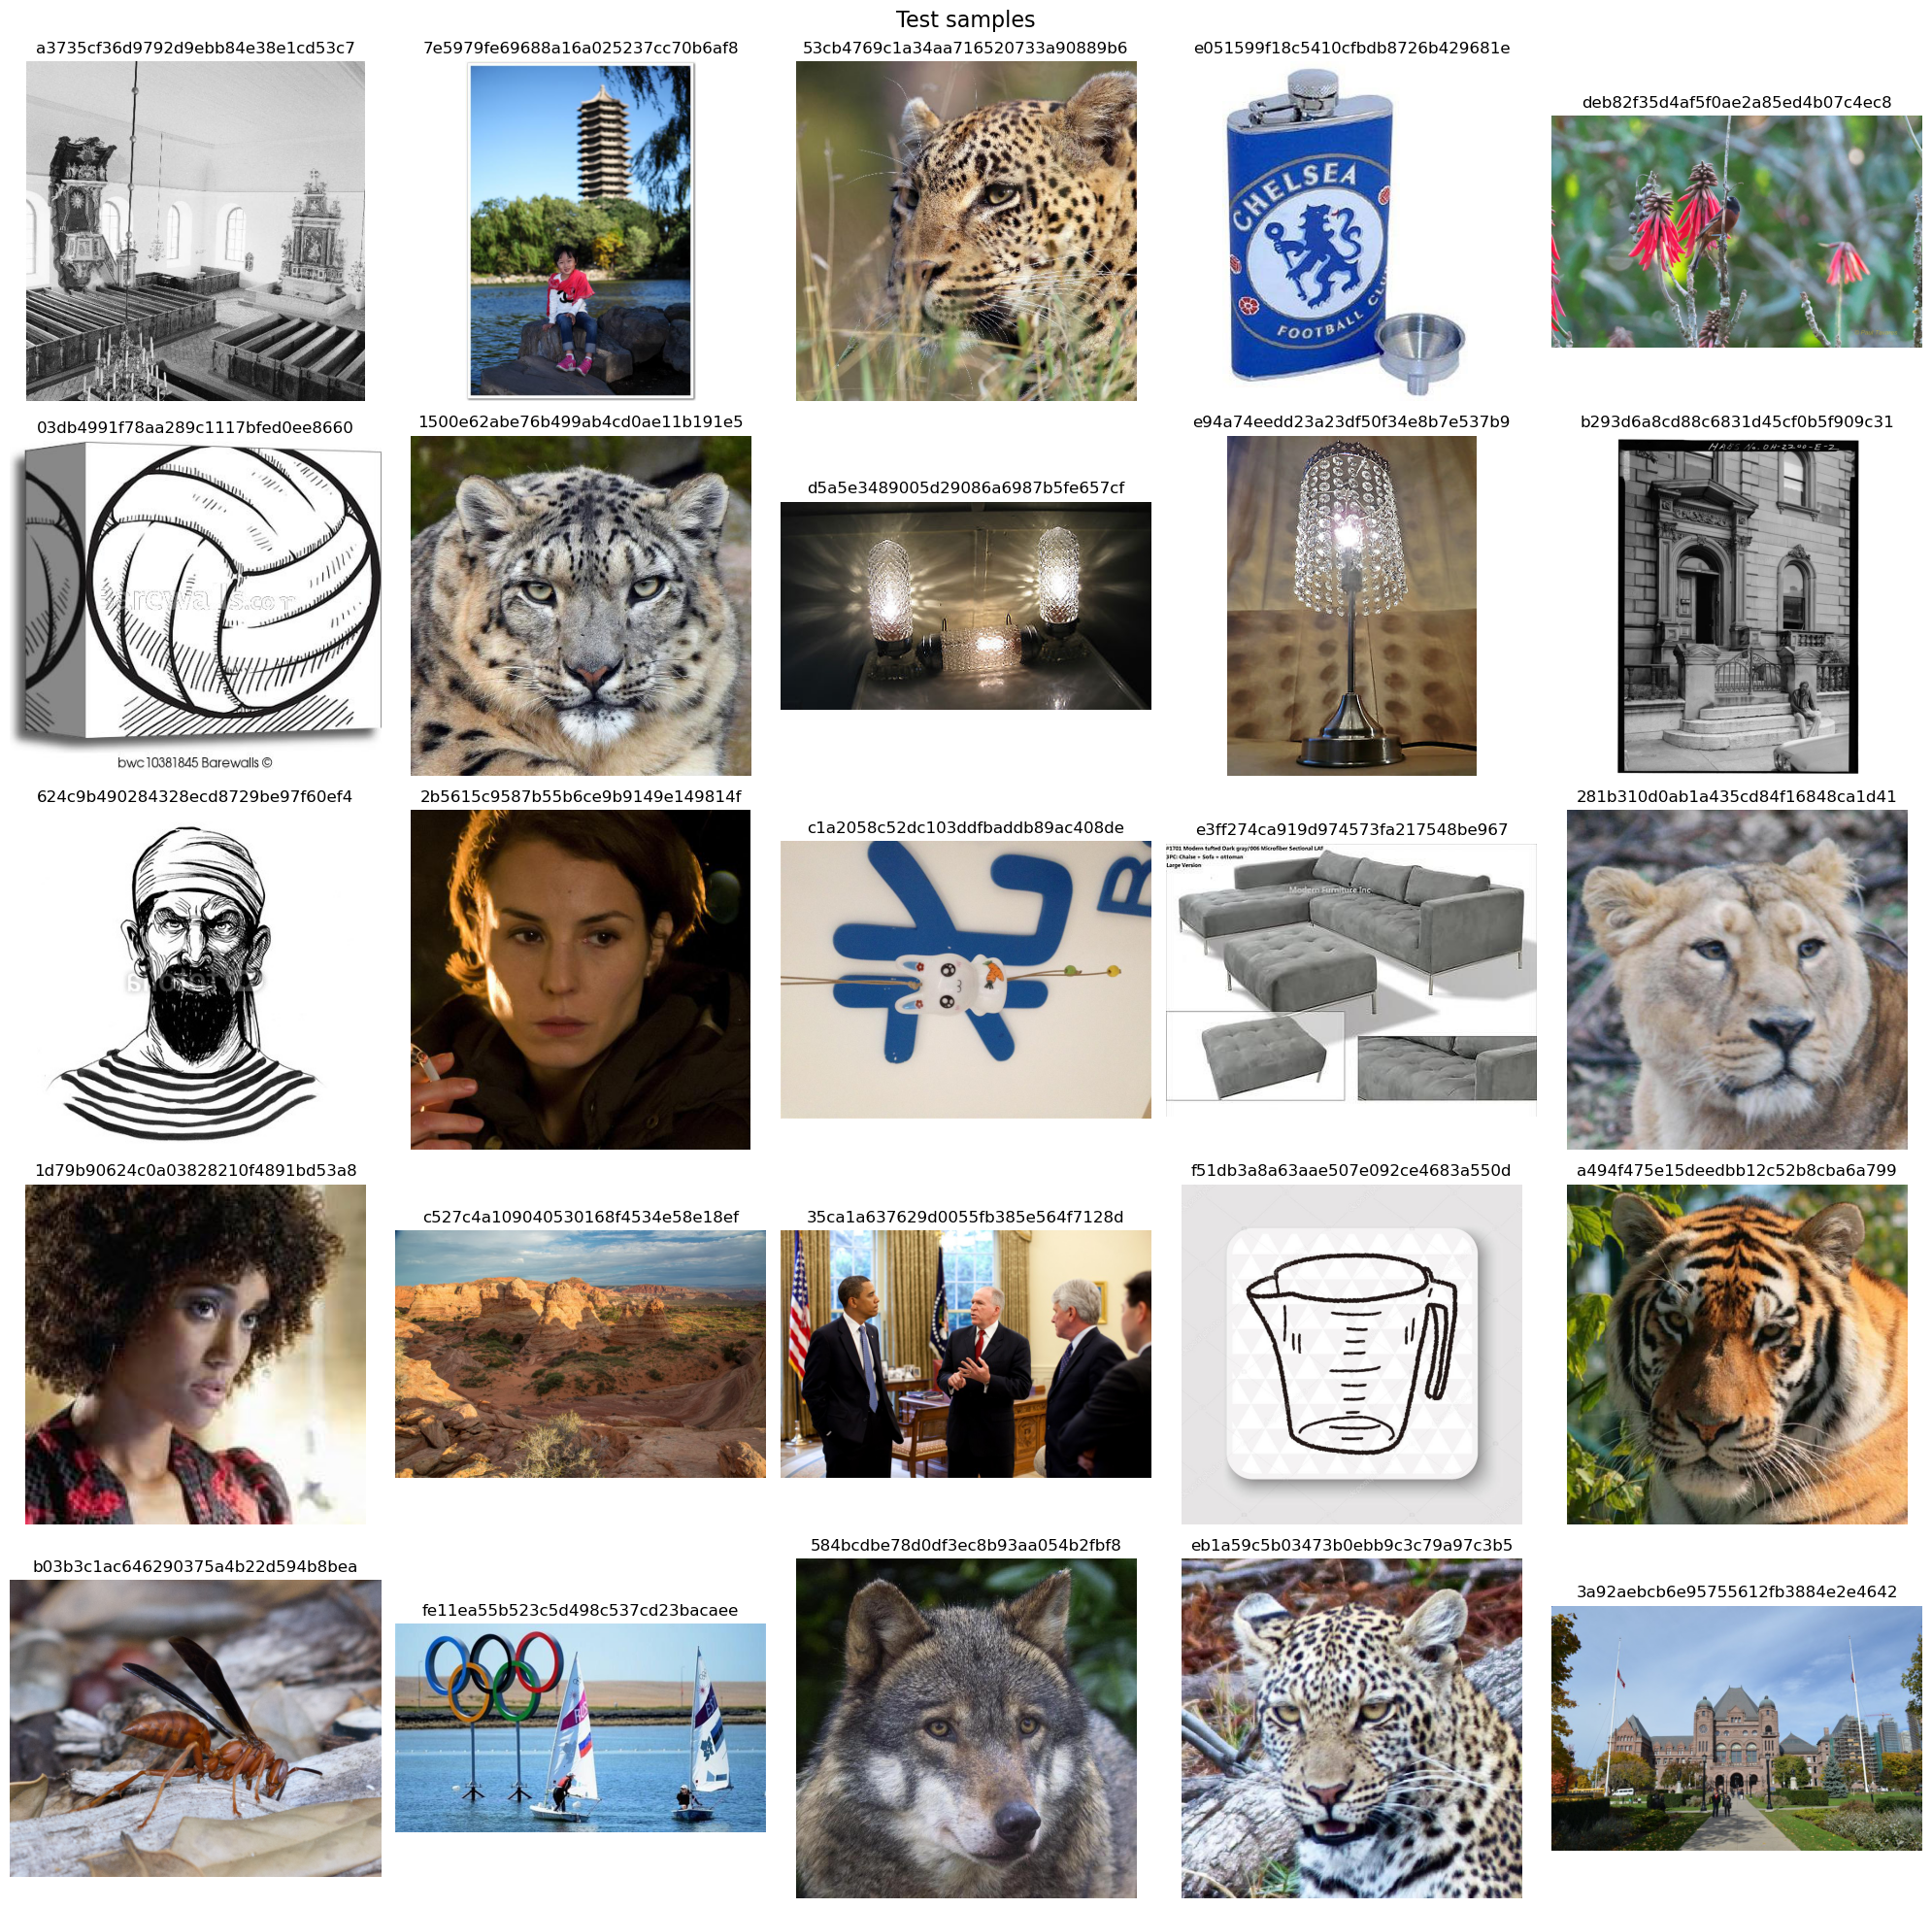

In [15]:
fig, axs = plt.subplots(ROWS_COUNT, COLUMNS_COUNT, figsize=(4 * COLUMNS_COUNT, 4 * ROWS_COUNT))
fig.suptitle("Test samples", fontsize=16)

for i in range(ROWS_COUNT*COLUMNS_COUNT):
    row_num = i // COLUMNS_COUNT
    col_num = i % COLUMNS_COUNT

    row = chosen_test_samples_df.iloc[i]
    img = plt.imread(os.path.join(TEST_DIR, f"{row['file_id']}.jpg"))
    axs[row_num, col_num].imshow(img)
    axs[row_num, col_num].set_title(row['file_id'])
    axs[row_num, col_num].axis('off')
    
fig.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

Almost 1/4 of randomly selected samples are wolves, lions, leopards, foxes, and other fancy cats and dogs.

## Images size (in pixels)

In [16]:
def obtain_size(file_id, data_dir):
    img = plt.imread(os.path.join(data_dir, f"{file_id}.jpg"))
    return img.shape

In [17]:
train_df['size'] = train_df['file_id'].apply(lambda file_id: obtain_size(file_id, TRAIN_DIR))
test_df['size'] = test_df['file_id'].apply(lambda file_id: obtain_size(file_id, TEST_DIR))

In [18]:
train_df['channels'] = train_df['size'].apply(lambda size: size[2] if len(size) == 3 else 1)
train_df['2d_size'] = train_df['size'].apply(lambda size: size[:2])

test_df['channels'] = test_df['size'].apply(lambda size: size[2] if len(size) == 3 else 1)
test_df['2d_size'] = test_df['size'].apply(lambda size: size[:2])

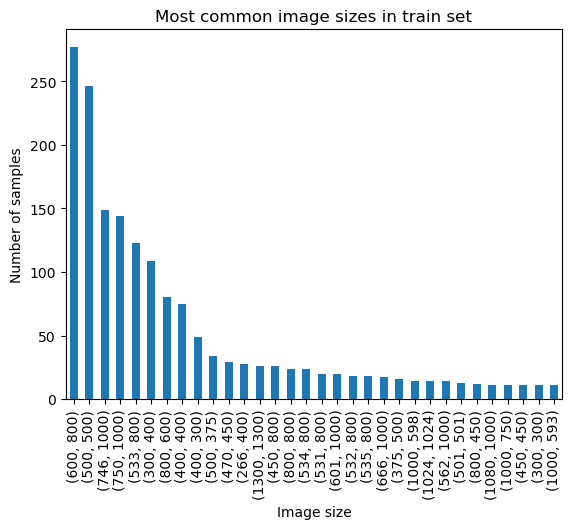

In [19]:
plt.title("Most common image sizes in train set")
train_df['2d_size'].value_counts().loc[train_df['2d_size'].value_counts() > 10].plot(kind='bar')
plt.xlabel("Image size")
plt.ylabel("Number of samples")
plt.show()

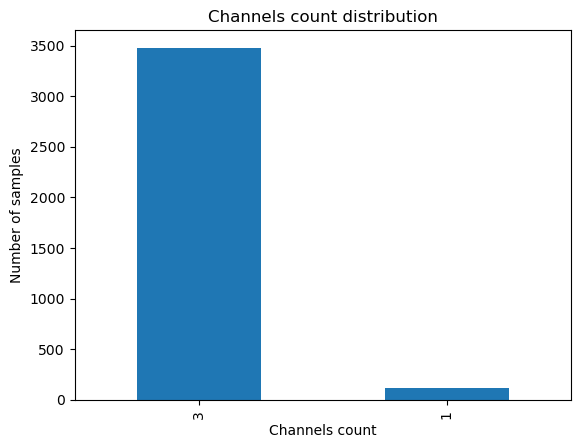

In [20]:
train_df['channels'].value_counts().plot(kind='bar')
plt.title("Channels count distribution")
plt.xlabel("Channels count")
plt.ylabel("Number of samples")
plt.show()

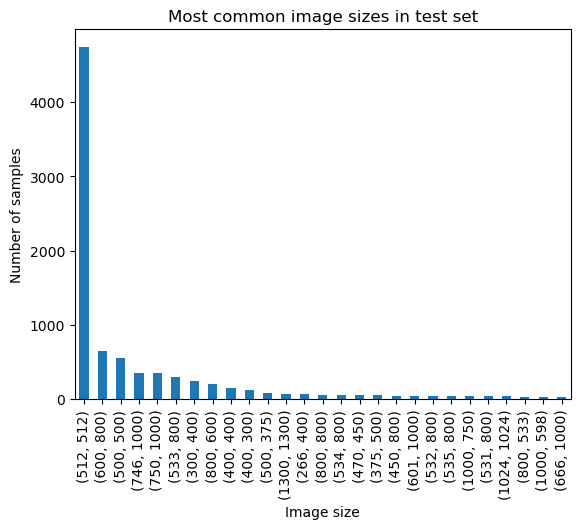

In [21]:
test_df['2d_size'].value_counts().loc[test_df['2d_size'].value_counts() > 30].plot(kind='bar')
plt.title("Most common image sizes in test set")
plt.xlabel("Image size")
plt.ylabel("Number of samples")
plt.show()

Changed distribution here is quite strange. There are lots of 512x512 pixels images (~4700), that is about 30% of the data, that is close to the distractors count. That's suspicuos and we should check if that is a confident distractor predictor later.

One more strange thing is that all the 512x512 images are 3-channeled, however they are 1/3 of all the images and there should be 1/3 of grayscales if this distribution were natural.

In train set, there were only 3 samples of size 512x512:

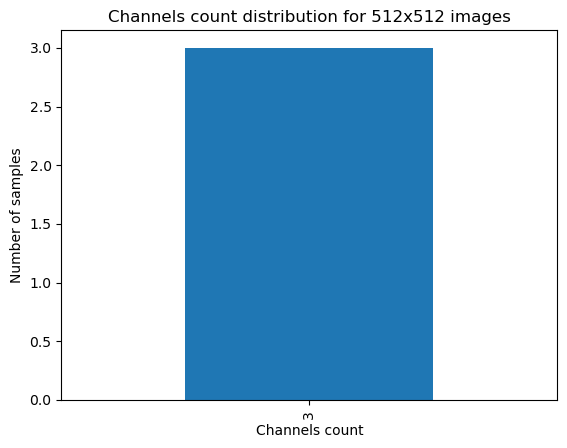

In [90]:
train_df.loc[train_df['2d_size'] == (512, 512), 'channels'].value_counts().plot(kind='bar')
plt.title("Channels count distribution for 512x512 images")
plt.xlabel("Channels count")
plt.ylabel("Number of samples")
plt.show()

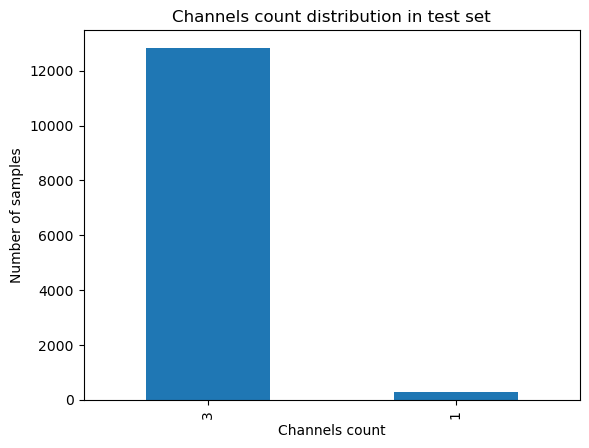

In [84]:
test_df['channels'].value_counts().plot(kind='bar')
plt.title("Channels count distribution in test set")
plt.xlabel("Channels count")
plt.ylabel("Number of samples")
plt.show()

In [24]:
test_df['height'] = test_df['2d_size'].apply(lambda size: size[0])

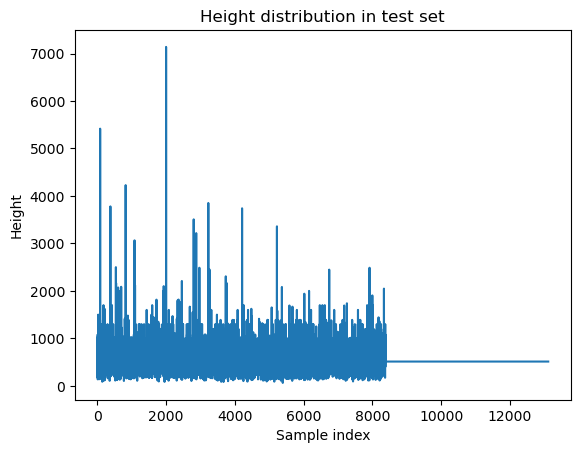

In [26]:
test_df['height'].plot.line()
plt.title("Height distribution in test set")
plt.xlabel("Sample index")
plt.ylabel("Height")
plt.show()